# Salary Data Analysis

Basic Python Package Load

In [180]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols      # For n-way ANOVA

from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import zscore

Load the Data set:

In [2]:
df=pd.read_csv('salaryData.csv')

To See the First Five Records

In [3]:
df.head()

,Education,Occupation,Salary
0,Doctorate,Adm-clerical,153197
1,Doctorate,Adm-clerical,115945
2,Doctorate,Adm-clerical,175935
3,Doctorate,Adm-clerical,220754
4,Doctorate,Sales,170769


In [90]:
df.describe(include="all")

,Education,Occupation,Salary
count,40,40,40.000000
unique,3,4,NaN
top,Doctorate,Prof-specialty,NaN
freq,16,13,NaN
mean,NaN,NaN,162186.875000
std,NaN,NaN,64860.407506
min,NaN,NaN,50103.000000
25%,NaN,NaN,99897.500000
50%,NaN,NaN,169100.000000
75%,NaN,NaN,214440.750000


for additional understanding

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Education   40 non-null     category
 1   Occupation  40 non-null     object  
 2   Salary      40 non-null     int64   
dtypes: category(1), int64(1), object(1)
memory usage: 912.0+ bytes


In [86]:
df.shape

(40, 3)

In [89]:
n=df.shape[0]*df.shape[1] #total no of observations
k=df.shape[1] #no of groups
print('total no of observations', n)
print('no of groups', k)

total no of observations 120
no of groups 3


To see whether any null or blank values present in the data

In [72]:
df.isnull().sum()

Education     0
Occupation    0
Salary        0
dtype: int64

From above we see there 0 records for null values

Create Barplot to check the Salary as per the Education

C:\diksha\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Education', ylabel='Salary'>

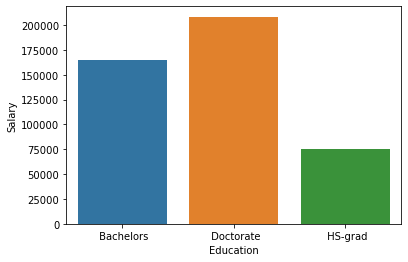

In [154]:
sns.barplot(df['Education'],df['Salary'],ci=None)

From the above Barplot we can see that Salary on the basis of  Education, Doctorate is Highest and HS-grad is the least.

In [157]:
df.isnull().sum()[df.isnull().sum()>0]

Series([], dtype: int64)

Also we can see Pointplot to see the difference in Salary amongst different Education level.

<AxesSubplot:xlabel='Education', ylabel='Salary'>

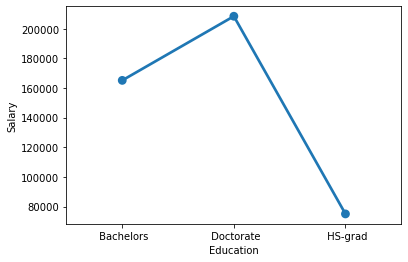

In [30]:
sns.pointplot(x='Education', y='Salary', data=df, ci=None)

In [43]:
formula = 'Salary ~ C(Education)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
print(aov_table)

                df        sum_sq       mean_sq         F        PR(>F)
C(Education)   2.0  1.026955e+11  5.134773e+10  30.95628  1.257709e-08
Residual      37.0  6.137256e+10  1.658718e+09       NaN           NaN


In [44]:
formula = 'Salary ~ C(Occupation)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
print(aov_table)

                 df        sum_sq       mean_sq         F    PR(>F)
C(Occupation)   3.0  1.125878e+10  3.752928e+09  0.884144  0.458508
Residual       36.0  1.528092e+11  4.244701e+09       NaN       NaN


Count Plot showing Education

In [81]:
df['Education'].value_counts()

 Doctorate    16
 Bachelors    15
 HS-grad       9
Name: Education, dtype: int64

C:\diksha\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Education', ylabel='count'>

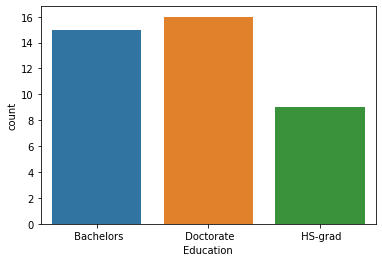

In [76]:
sns.countplot(df['Education'])

As per the above graph we see for Doctorate Education  is comparitively higher than any other Education and HS-grad Education is lowest.

<AxesSubplot:xlabel='Education', ylabel='Salary'>

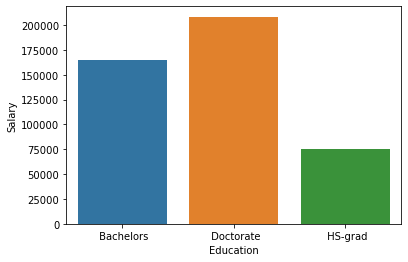

In [83]:
sns.barplot(x='Education',y='Salary',ci=None,data=df)

<AxesSubplot:xlabel='Occupation', ylabel='Salary'>

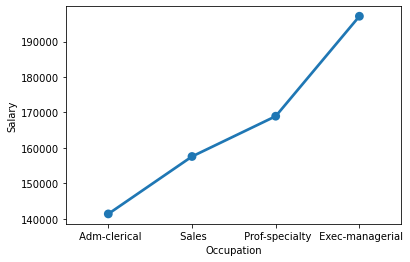

In [47]:
sns.pointplot(x='Occupation', y='Salary', data=df, ci=None)

# Problem B:

<AxesSubplot:xlabel='Occupation', ylabel='Salary'>

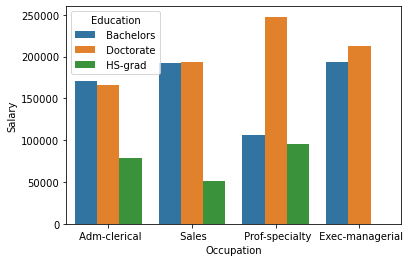

In [64]:
sns.barplot(x='Occupation', y='Salary',hue='Education', data=df, ci=None)

<AxesSubplot:xlabel='Occupation', ylabel='Salary'>

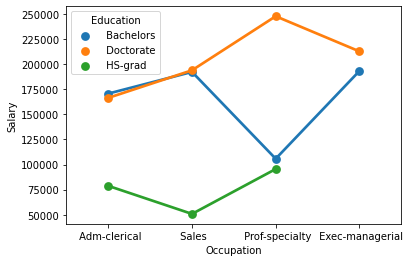

In [65]:
sns.pointplot(x='Occupation', y='Salary',hue='Education', data=df, ci=None)

2.Perform a two-way ANOVA based on Salary with respect to both Education and Occupation (along with their interaction Education*Occupation). State the null and alternative hypotheses and state your results. How will you interpret this result?

In [91]:
formula = 'Salary ~ C(Education)+C(Occupation)+C(Education):C(Occupation)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
print(aov_table)

                              df        sum_sq       mean_sq          F  \
C(Education)                 2.0  1.026955e+11  5.134773e+10  72.211958   
C(Occupation)                3.0  5.519946e+09  1.839982e+09   2.587626   
C(Education):C(Occupation)   6.0  3.634909e+10  6.058182e+09   8.519815   
Residual                    29.0  2.062102e+10  7.110697e+08        NaN   

                                  PR(>F)  
C(Education)                5.466264e-12  
C(Occupation)               7.211580e-02  
C(Education):C(Occupation)  2.232500e-05  
Residual                             NaN  
